# **K-NN(K-근접이웃)실습**

#### 간단한 학습 예제 데이터로 K-NN 에 대한 이해를 돕도록 하겠습니다.

사용에 필요한 라이브러리는 아래와 같습니다.
* numpy 
* pandas
* sklearn
* mglearn


In [100]:
%load_ext watermark
%watermark -v -p sklearn,numpy,mglearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

sklearn: 0.0
numpy  : 1.19.1
mglearn: 0.1.9



In [101]:
# markdown 시각화 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

__<사용에 필요한 라이브러리 호출 및 한글화 문제 해결>__

In [102]:
# 라이브러리 시각화
import numpy as np
import pandas as pd 
import sklearn
import mglearn
import matplotlib.pyplot as plt

# matplotlib 에서 한글 문제 해결(Window)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


간단한 예제 데이터를 통해서 __K-NN(근접 이웃)의 분류문제의 수행과정__을 알아보도록 하겠습니다.<br> 아래 데이터는 2개 클래스(●,▲) 를 가진 학습 데이터 입니다.<br> 새로이 들어온 데이터(★)에 대하여 클래스를 어떻게 분류하는지 알아보도록 하겠습니다.

In [103]:
# 그림의 사이즈를 결정
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (7,7)

# 토이 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()

print("학습데이터:X")
print(X)

print("-----------------------------------------")

print("검증데이터:y")
print(y)

학습데이터:X
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
-----------------------------------------
검증데이터:y
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: (26, 2)


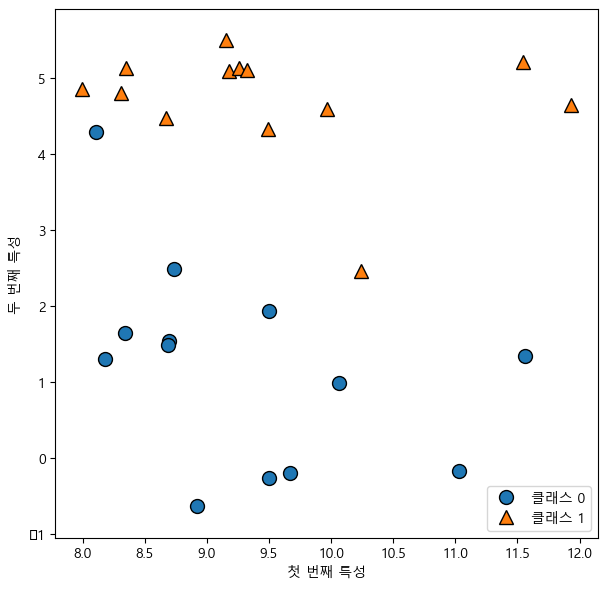

In [104]:
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))


#### 참조할 근접이웃의 수를 1개로 가질 경우,

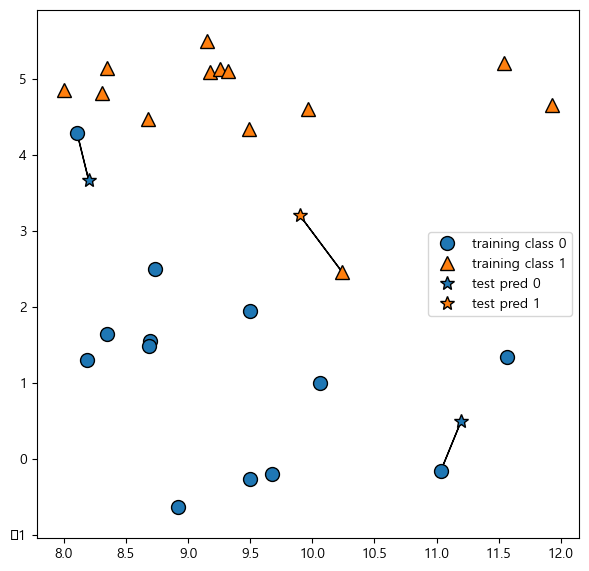

In [105]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

#### 참조할 근접이웃의 수를 3개로 가질 경우,

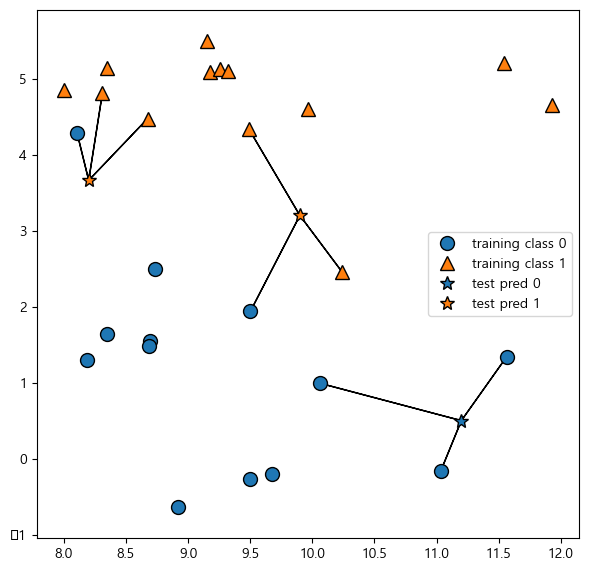

In [106]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### 참조할 근접이웃의 수를 4개로 가질 경우,

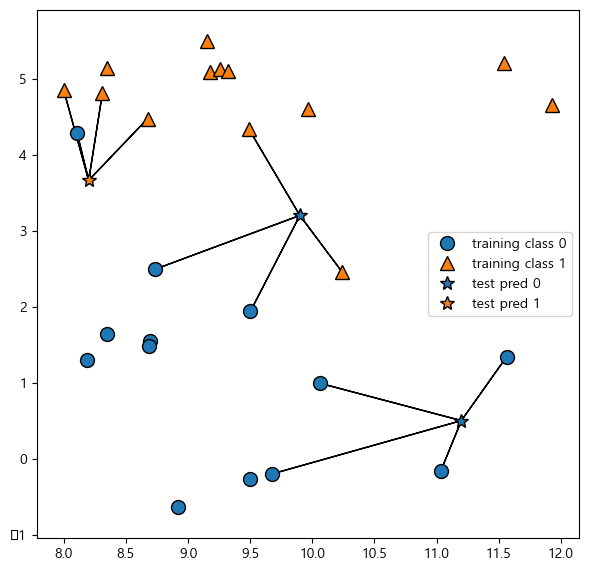

In [107]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

##### 실제로 테스트 데이터 (7개)를 예측해보자

7개의 테스트 데이터를 예측해하고, 정확도를 판단해보자

In [234]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

- K-NN을 활용한 분류모델: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#  
- K-NN을 활용한 예측모델: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

```sklearn.neighbors``` 클래스에서 제공하는 ```KNeighborsClassifier()``` 함수를 통해서 K-인접이웃을 활용한 분류가 가능합니다.

In [235]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [236]:
print(X_train)
print(y_train)

[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [237]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [238]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


##### 다음으로는 K(참조할 이웃의 수)를 변화시켜 가면서 학습데이터 정확도와 검증데이터의 예측정확도를 비교해보자.
- 실습 위해서 scikit-learn에서 제공하는 brest_cancer데이터를 활용해보겠습니다.

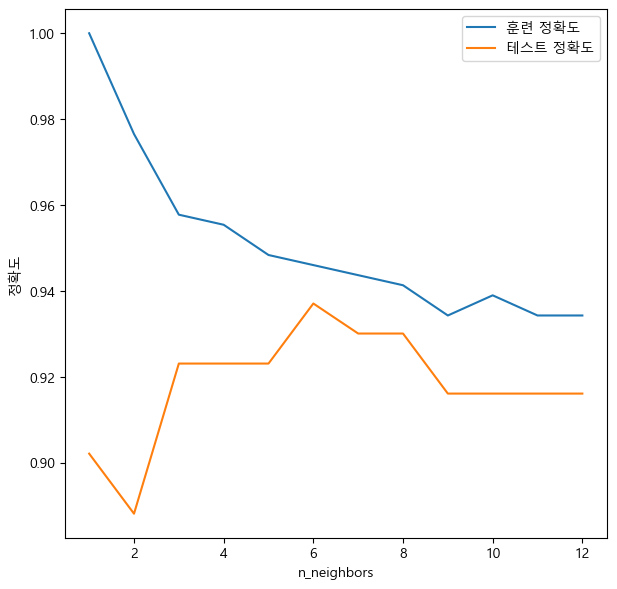

In [241]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 13)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## <Iris 데이터셋 통한 K-NN 분류경계면 실습>

##### K-NN에서 K에 따른 분류 결졍경계면 확인

아래의 3가지 범주를 가지는 iris데이터를 이용해서 K-NN 분류 모델기를 생성후, <br>
K를 변화 시킬경우 분류 예측 경계면의 변화를 확인해 보겠습니다.

Automatically created module for IPython interactive environment
5
15
30


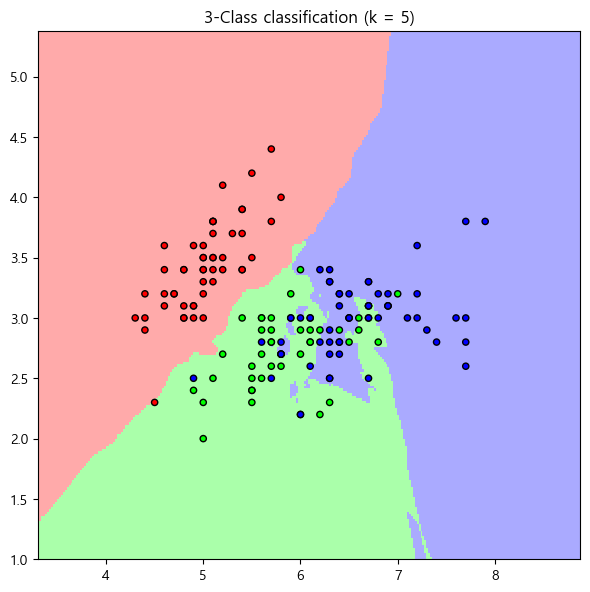

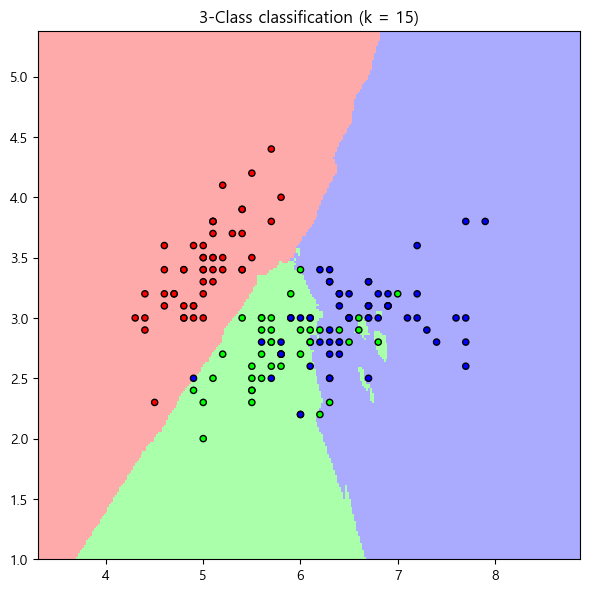

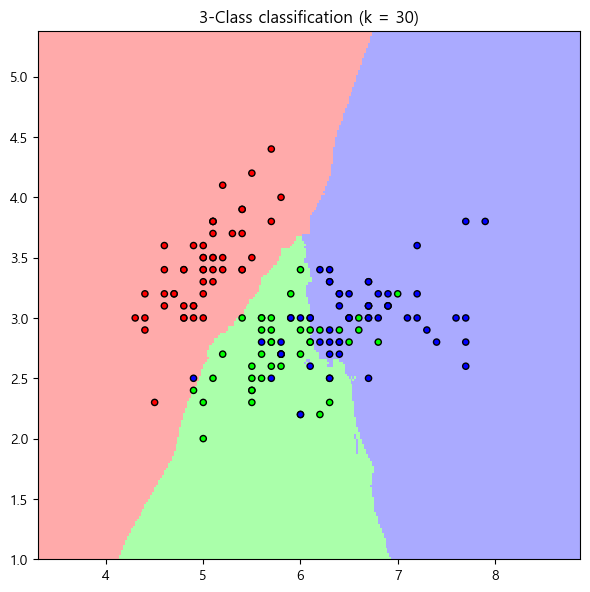

In [243]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [5,15,30]:
    print(n_neighbors)
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))

plt.show()

##### Iris 전체데이터를 통해서 예측을 해보도록 하겠습니다.

In [244]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [262]:
X = iris.data
y = iris.target

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1234)

for K in [5,10,15,20,25,30]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(train_x, train_y)
    
    pre_y = clf.predict(test_x)
    tmp_acc = accuracy_score(test_y, pre_y)
        
    print( "K is {}".format(K), "Test acuurcy: {0:.4f}".format(tmp_acc))


K is 5 Test acuurcy: 0.9778
K is 10 Test acuurcy: 0.9778
K is 15 Test acuurcy: 0.9556
K is 20 Test acuurcy: 0.9778
K is 25 Test acuurcy: 0.9556
K is 30 Test acuurcy: 0.9556


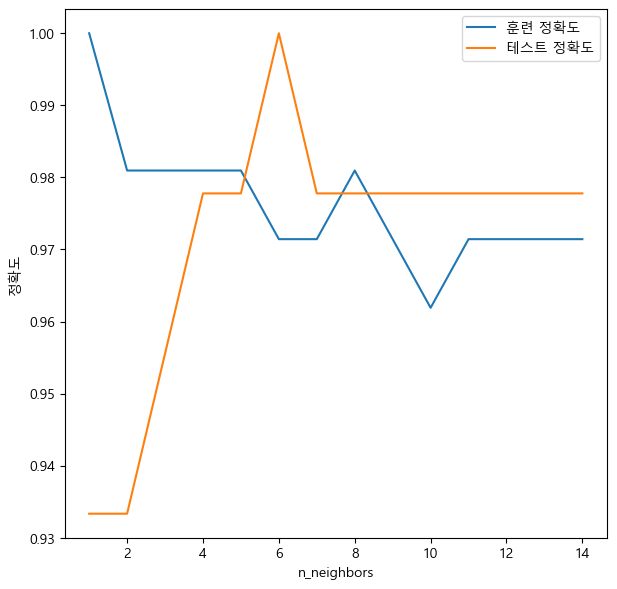

In [263]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_x, train_y)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(train_x, train_y))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(test_x, test_y))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [264]:
from itertools import compress

neighbors_settings = list(range(1, 15) )
best_idx = test_accuracy==max(test_accuracy)

best_n = list(compress(neighbors_settings, best_idx))
print('Best neighbors:',best_n[0])

Best neighbors: 6


In [265]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_x, train_y)

train_pred_y = clf.predict(train_x)
test_pred_y = clf.predict(test_x)
tmp_acc = accuracy_score(test_y, test_pred_y)

knn_conf_default = confusion_matrix(test_y, test_pred_y)

default_k = clf.get_params()['n_neighbors']

print( "Default K is {}".format(default_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))


Default K is 5 , Test acuurcy: 0.9778


In [266]:

print(f'Default 학습 정오행렬 \n{confusion_matrix(train_y, train_pred_y)}')
print(f'Default 테스트 정오행렬 \n{confusion_matrix(test_y, test_pred_y)}\n')
print(f'Default 학습 정확도 : {accuracy_score(train_y, train_pred_y):.4f}')
print(f'Default 테스트 정확도 : {accuracy_score(test_y, test_pred_y):.4f}')

Default 학습 정오행렬 
[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]
Default 테스트 정오행렬 
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Default 학습 정확도 : 0.9810
Default 테스트 정확도 : 0.9778


In [269]:
best_k = best_n[0]
best_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(train_x, train_y)

train_pred_y = best_clf.predict(train_x)
test_pred_y = best_clf.predict(test_x)
tmp_acc = accuracy_score(test_y, test_pred_y)

print( "Best K is {}".format(best_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))

best_knn_conf = confusion_matrix(test_y, pre_y)

Best K is 6 , Test acuurcy: 1.0000


In [270]:


print(f'Best_K 학습 정오행렬 \n{confusion_matrix(train_y, train_pred_y)}')
print(f'Best_K 테스트 정오행렬 \n{confusion_matrix(test_y, test_pred_y)}\n')
print(f'Best_K 학습 정확도 : {accuracy_score(train_y, train_pred_y):.4f}')
print(f'Best_K 테스트 정확도 : {accuracy_score(test_y, test_pred_y):.4f}')

Best_K 학습 정오행렬 
[[35  0  0]
 [ 0 34  1]
 [ 0  2 33]]
Best_K 테스트 정오행렬 
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Best_K 학습 정확도 : 0.9714
Best_K 테스트 정확도 : 1.0000


## <Personal Loan 데이터셋을 활용한 K-NN 분류 실습>

#### 독립변수 
- ID: 고객 ID
- Age: 고객 나이
- Experience: 고고객 직업 경험 수행기간
- Income: 연간 고객의 수입
- ZIPCode: 고객의 주소 ZIP 코드
- Family: 고객의 가구수
- CCAvg : 월 평균 고객의 신용카드 사용금액
- Education: 고객의 교육수준  1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: 고객의 주택 담보 가치
- Securities Account: 고객의 증권계좌 보유여부
- CD Account: 고객의 예금증서 보유 여부
- Online: 고객의 온라인뱅킹 여부
- CreditCard: 고객의 신용카드 발급여부

#### 반응변수
-  Personal Loan(대출여부): 1 or 0

In [280]:
ploan = pd.read_csv("./data/Personal Loan.csv")

ploan.head(20) # 데이터 예시 확인
ploan.shape

(2500, 14)

In [281]:
# 의미없는 변수 제거 + NA 관측치 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [282]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0


In [283]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [284]:
### personal Loan 으로 학습데이터와 검증데이터를 나누어서 K-NN 수행해보기

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1750, 11) (750, 11) (1750,) (750,)


K-NN 방법론의 경우 거리를 기반으로 수행되기 때문에 학습데이터를 정규화를 진행할 필요가 있습니다.  
```sklearn.preprocessing``` 클래스에서 제공하는 함수를 활용하여 **학습데이터를 통해 데이터의 정규화를 수행**해보도록 하겠습니다.

In [285]:
import sklearn.preprocessing as preprocessing

preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [286]:
for K in [5,10,15,20,25,30]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    
    pre_y = clf.predict(X_test)
    tmp_acc = accuracy_score(y_test, pre_y)
        
    print( "K is {}".format(K), "Test acuurcy: {0:.4f}".format(tmp_acc))

K is 5 Test acuurcy: 0.8933
K is 10 Test acuurcy: 0.8960
K is 15 Test acuurcy: 0.9053
K is 20 Test acuurcy: 0.8947
K is 25 Test acuurcy: 0.8987
K is 30 Test acuurcy: 0.9013


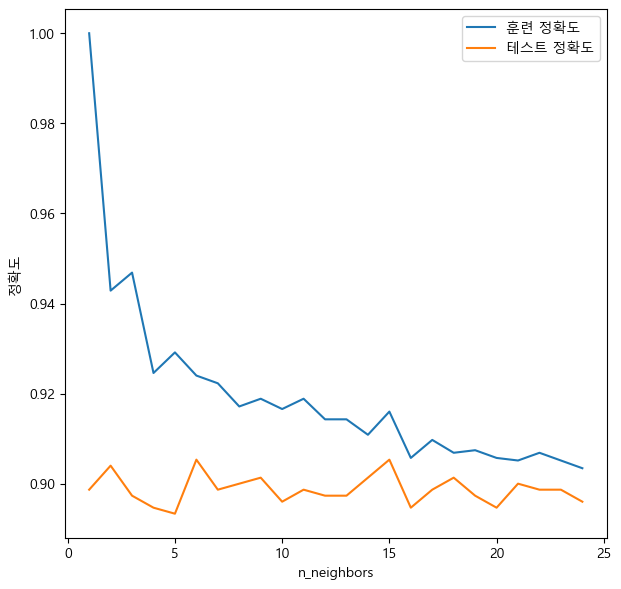

In [287]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [300]:
from itertools import compress

neighbors_settings 
best_idx = test_accuracy==max(test_accuracy)

best_n = list(compress(neighbors_settings, best_idx))
print('Best neighbors:',best_n[0])

Best neighbors: 6


In [301]:
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [302]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

train_pred_y = clf.predict(X_train)
test_pred_y = clf.predict(X_test)
tmp_acc = accuracy_score(y_test, test_pred_y)

knn_conf_default = confusion_matrix(y_test, test_pred_y)

default_k = clf.get_params()['n_neighbors']

print( "Default K is {}".format(default_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))


Default K is 5 , Test acuurcy: 0.8933


In [303]:
best_k = best_n[0]
best_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(X_train, y_train)

train_pred_y = best_clf.predict(X_train)
test_pred_y = best_clf.predict(X_test)
tmp_acc = accuracy_score(y_test, test_pred_y)

print( "Best K is {}".format(best_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))

best_knn_conf = confusion_matrix(y_test, test_pred_y)

Best K is 6 , Test acuurcy: 0.9053


In [304]:
print(f'학습 정오행렬 \n{confusion_matrix(y_train, train_pred_y)}')
print(f'테스트 정오행렬 \n{confusion_matrix(y_test, test_pred_y)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, train_pred_y):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, test_pred_y):.4f}')

학습 정오행렬 
[[1561   10]
 [ 123   56]]
테스트 정오행렬 
[[660  13]
 [ 58  19]]

학습 정확도 : 0.9240
테스트 정확도 : 0.9053


In [305]:
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [306]:
perf_mat = pd.DataFrame(columns=["TPR", "TNR", "ACC", "BCR","F1"],
                        index =['KNN_Default', 'KNN_best'])


perf_mat.loc['KNN_Default']=perf_eval(knn_conf_default)
perf_mat.loc['KNN_best']=perf_eval(best_knn_conf)


In [307]:
perf_mat

,TPR,TNR,ACC,BCR,F1
KNN_Default,0.311688,0.959881,0.893333,0.546977,0.375
KNN_best,0.246753,0.980684,0.905333,0.491922,0.348624


## K-NN을 활용한 회귀(Regression) 실습 예제

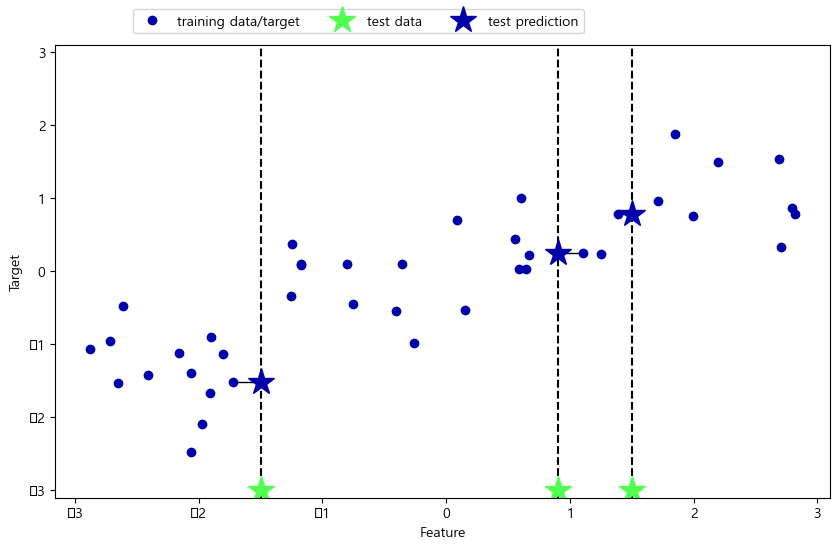

In [308]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

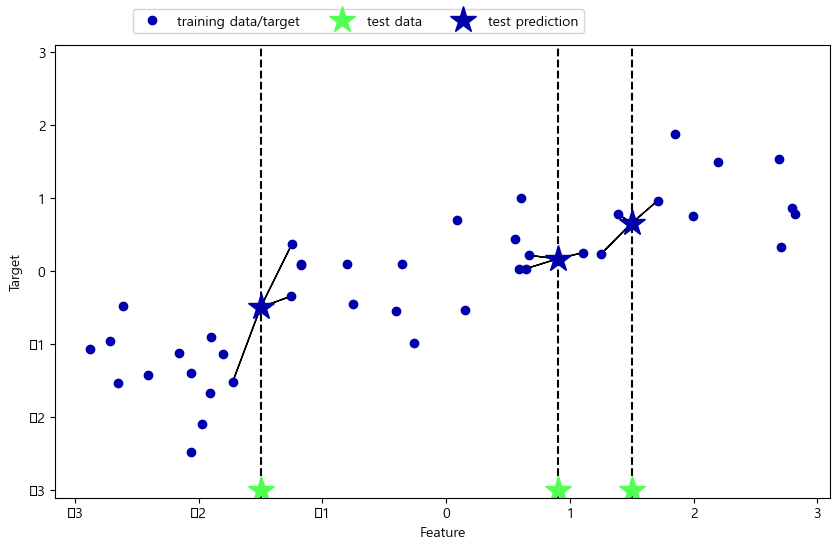

In [309]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [310]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [311]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


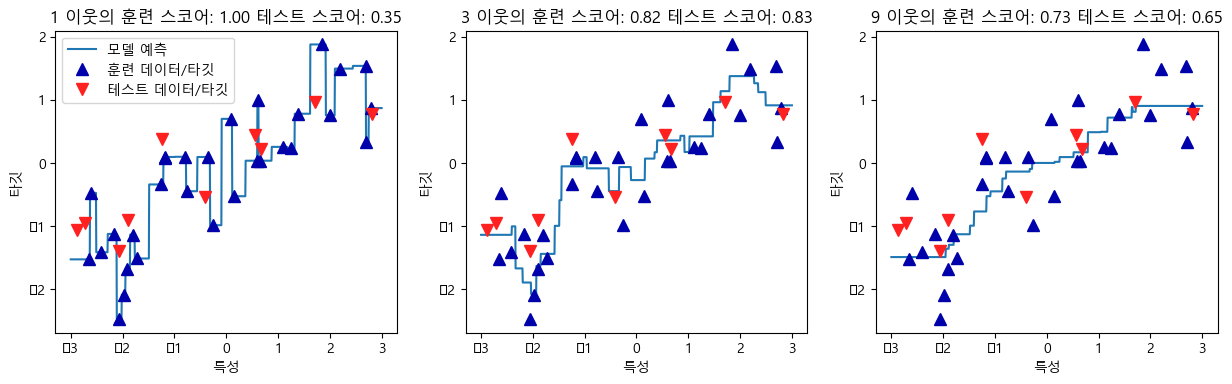

In [312]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

#### Toyota 데이터를 활용한 K-NN Regression 실습

## **실습예제4 : 도요타 코롤라 중고차 가격 데이터셋**
예제 데이터(중고차데이터:ToyotaCorolla 데이터셋)를 활용해서 K-NN 예측을 수행해보도록 하겠습니다.

- 사양에 따른 도요타 중고차 차량의 가격예측
- 사양정보에 따른 도요타 중고차 1,442대의 가격 데이터셋
- 사용된 변수들
    - 판매가격 (Euros)
    - 내용연수 (2004년 8월 현재)
    - 연비 (kilometers)
    - 연료유형 (diesel, petrol, CNG)
    - 마력 (horsepower)
    - 금속색상 (1=yes, 0=no)
    - 자동변속 (1=yes, 0=no)
    - 실린더 부피 (cylinder volume)
    - 자동차 문의 개수
    - 분기별 도로 사용세(road tax)
    - 무게 (kg)


##### 해당 변수들을 사용하기에 앞서서 **범주형 변수들은 이항변수로 변환**하는 과정이 필요합니다.
- Diesel (1=yes, 0=no)
- CNG (1=yes, 0=no)
- None needed for “Petrol” (reference category)

### 데이터 불러오기

In [378]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
print(corolla.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

### 데이터 관측치 갯수(nCar)와 변수의 수(nVar) 확인

In [379]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


# 데이터 전처리

## 범주형 변수를 이진형 변수로 변환

In [380]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [381]:

# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [382]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

## 불필요한 변수 제거 및 가변수 추가

In [383]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 

In [384]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 36) (431, 36) (1005,) (431,)


K-NN 방법론의 경우 거리를 기반으로 수행되기 때문에 학습데이터를 정규화를 진행할 필요가 있습니다.  
```sklearn.preprocessing``` 클래스에서 제공하는 함수를 활용하여 **학습데이터를 통해 데이터의 정규화를 수행**해보도록 하겠습니다.

In [385]:
import sklearn.preprocessing as preprocessing

preprocessor = preprocessing.Normalizer()
train_x = preprocessor.fit_transform(train_x)
test_x = preprocessor.transform(test_x)

- K-NN을 활용한 예측모델: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

```sklearn.neighbors``` 클래스에서 제공하는 ```KNeighborsRegressor()``` 함수를 통해서 K-인접이웃을 활용한 예측이 가능합니다.

In [386]:
from sklearn.neighbors import KNeighborsRegressor

In [387]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [388]:
for K in [1,2,4,6,8,10]:
    clf = neighbors.KNeighborsRegressor(n_neighbors=K)
    clf.fit(X_train, y_train)
    
    pre_y = clf.predict(X_test)
    tmp_MSE = mean_squared_error(y_test, pre_y)
        
    print( "K is {}".format(K), "Test MSE: {0:.6f}".format(tmp_acc))

K is 1 Test MSE: 0.905333
K is 2 Test MSE: 0.905333
K is 4 Test MSE: 0.905333
K is 6 Test MSE: 0.905333
K is 8 Test MSE: 0.905333
K is 10 Test MSE: 0.905333


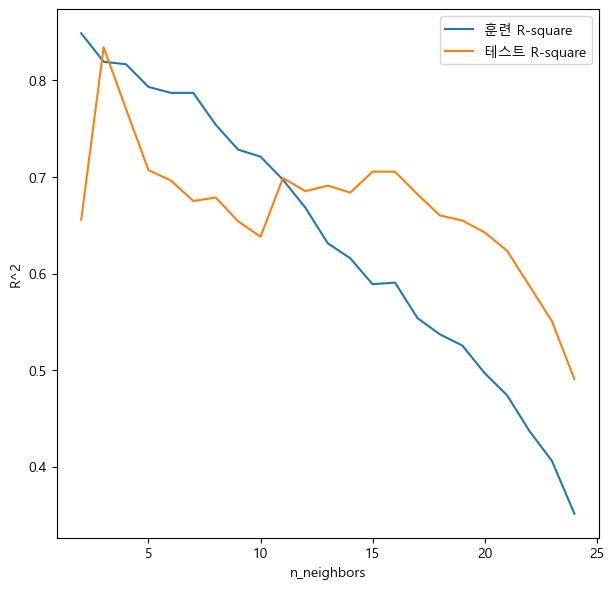

In [389]:
training_rsquare = []
test_rsquare = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(2, 25)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_rsquare.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_rsquare.append(clf.score(X_test, y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_rsquare, label="훈련 R-square")
plt.plot(neighbors_settings, test_rsquare, label="테스트 R-square")
plt.ylabel("R^2")
plt.xlabel("n_neighbors")
plt.legend()

In [390]:
from itertools import compress

neighbors_settings 
best_idx = test_rsquare==max(test_rsquare)

best_n = list(compress(neighbors_settings, best_idx))
print('Best neighbors:',best_n[0])

Best neighbors: 3


In [397]:
clf = neighbors.KNeighborsRegressor()
clf.fit(X_train, y_train)

train_pred_y = clf.predict(X_train)
test_pred_y = clf.predict(X_test)
default_k = clf.get_params()['n_neighbors']

default_mae = mean_absolute_error(y_test,test_pred_y)
default_mse = mean_squared_error(y_test,test_pred_y)
default_mape = mean_absolute_percentage_error(y_test,test_pred_y)
default_r2score = r2_score(y_test,test_pred_y)

print( "Default K is {}".format(default_k), ", Test MSE: {0:.4f}".format(default_mse))
print( "Default K is {}".format(default_k), ", Test MAE: {0:.4f}".format(default_mae))
print( "Default K is {}".format(default_k), ", Test R2-score: {0:.4f}".format(default_r2score))



Default K is 5 , Test MSE: 0.1922
Default K is 5 , Test MAE: 0.3615
Default K is 5 , Test R2-score: 0.7071


In [398]:
best_k = best_n[0]
best_clf = neighbors.KNeighborsRegressor(n_neighbors=best_k)
best_clf.fit(X_train, y_train)

train_pred_y = best_clf.predict(X_train)
test_pred_y = best_clf.predict(X_test)

best_mae = mean_absolute_error(y_test,test_pred_y)
best_mse = mean_squared_error(y_test,test_pred_y)
best_mape = mean_absolute_percentage_error(y_test,test_pred_y)
best_r2score = r2_score(y_test,test_pred_y)


print( "Best K is {}".format(best_k), ", Test MSE: {0:.4f}".format(best_mse))
print( "Best K is {}".format(best_k), ", Test MAE: {0:.4f}".format(best_mae))
print( "Best K is {}".format(best_k), ", Test R2-score: {0:.4f}".format(best_r2score))


Best K is 3 , Test MSE: 0.1087
Best K is 3 , Test MAE: 0.2537
Best K is 3 , Test R2-score: 0.8344


In [401]:
perf_mat = pd.DataFrame(columns=["K","MSE", "MAE", "MAPE", "r2_score"],
                        index =['KNN_Default', 'KNN_best'])


perf_mat.loc['KNN_Default']=[default_k,default_mae,default_mse,default_mape,default_r2score]
perf_mat.loc['KNN_best']=[best_k,best_mae,best_mse,best_mape,best_r2score]


In [402]:
perf_mat

,K,MSE,MAE,MAPE,r2_score
KNN_Default,5,0.361536,0.192213,56.6129,0.707138
KNN_best,3,0.253718,0.108677,39.1956,0.834417
